In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
plt.rcParams["figure.figsize"] = (9,6)

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/refs/heads/master/monthly-milk-production-pounds.csv")
data.head()

,Month,Monthly milk production (pounds per cow)
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Month                                     168 non-null    object
 1   Monthly milk production (pounds per cow)  168 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.8+ KB


In [5]:
data.tail()

,Month,Monthly milk production (pounds per cow)
163,1975-08,858
164,1975-09,817
165,1975-10,827
166,1975-11,797
167,1975-12,843


In [6]:
data["Month"] = pd.to_datetime(data["Month"])

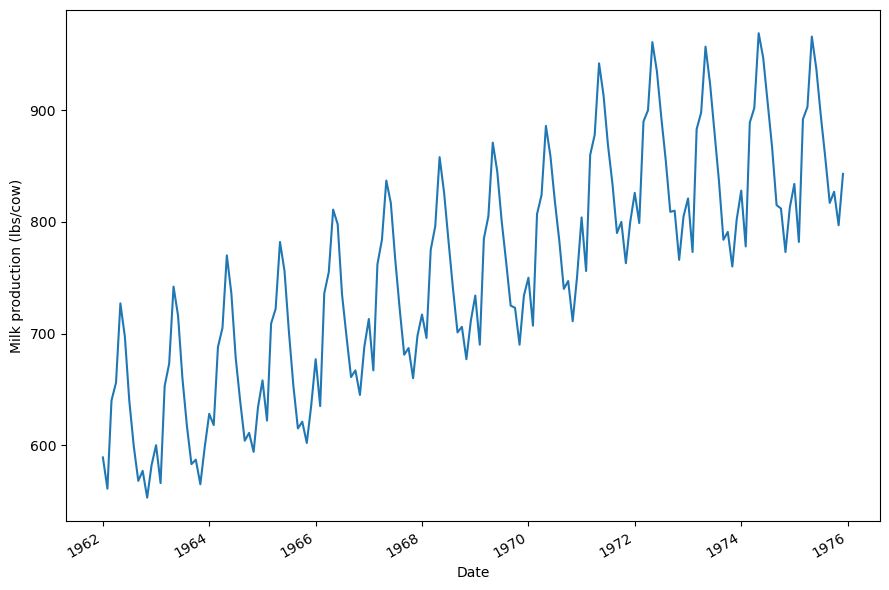

In [8]:
fig, ax = plt.subplots()

ax.plot(data["Month"], data["Monthly milk production (pounds per cow)"])
ax.set_xlabel("Date")
ax.set_ylabel("Milk production (lbs/cow)")

# plt.xticks(np.arange(0,168,12),np.arange(1962,1976,1))

fig.autofmt_xdate()

plt.tight_layout()
plt.show()

In [19]:
train = data[:-12]
test = data[-12:]

In [20]:
pred_df = test.copy()

pred_df["mean"] = train["Monthly milk production (pounds per cow)"].mean()

In [57]:
pred_df["last_year"] = (train["Monthly milk production (pounds per cow)"][-12:]).mean()

In [105]:
pred_df["last_timestep"] = train["Monthly milk production (pounds per cow)"].iloc[-1]

In [180]:
pred_df["last_season"] = train["Monthly milk production (pounds per cow)"].iloc[-12:].values 

# when assigning a sliced pandas series, if indices don't match, pandas leads to nan values. so use values to avoid index alignment issues

In [179]:
pred_df["last_season"] 

156    828
157    778
158    889
159    902
160    969
161    947
162    908
163    867
164    815
165    812
166    773
167    813
Name: last_season, dtype: int64

In [170]:
pred_df

,Month,Monthly milk production (pounds per cow),mean,last_year,last_timestep,last_season
156,1975-01-01,834,746.403846,858.416667,813,828
157,1975-02-01,782,746.403846,858.416667,813,778
158,1975-03-01,892,746.403846,858.416667,813,889
159,1975-04-01,903,746.403846,858.416667,813,902
160,1975-05-01,966,746.403846,858.416667,813,969
161,1975-06-01,937,746.403846,858.416667,813,947
162,1975-07-01,896,746.403846,858.416667,813,908
163,1975-08-01,858,746.403846,858.416667,813,867
164,1975-09-01,817,746.403846,858.416667,813,815
165,1975-10-01,827,746.403846,858.416667,813,812


In [169]:
pred_df["last_season"].values

array([828, 778, 889, 902, 969, 947, 908, 867, 815, 812, 773, 813],
      dtype=int64)

In [148]:
pred_df["last_year"]

156    858.416667
157    858.416667
158    858.416667
159    858.416667
160    858.416667
161    858.416667
162    858.416667
163    858.416667
164    858.416667
165    858.416667
166    858.416667
167    858.416667
Name: last_year, dtype: float64

In [149]:
pred_df["mean"]

156    746.403846
157    746.403846
158    746.403846
159    746.403846
160    746.403846
161    746.403846
162    746.403846
163    746.403846
164    746.403846
165    746.403846
166    746.403846
167    746.403846
Name: mean, dtype: float64

In [150]:
%matplotlib inline

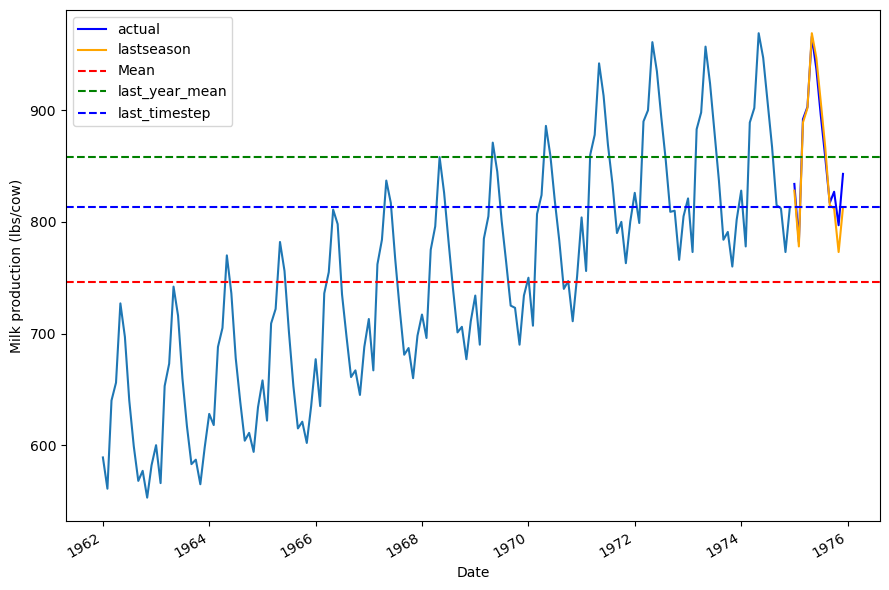

In [151]:
fig, ax = plt.subplots()

ax.plot(train["Month"], train["Monthly milk production (pounds per cow)"])
ax.plot(pred_df["Month"],pred_df["Monthly milk production (pounds per cow)"],"b-",label = "actual")
ax.plot(pred_df["Month"],pred_df["last_season"],"orange",label = "lastseason")
ax.axhline(pred_df["mean"].iloc[0], color="r", linestyle="--", label="Mean")
ax.axhline(pred_df["last_year"].iloc[0], color="g", linestyle="--", label="last_year_mean")
ax.axhline(pred_df["last_timestep"].iloc[0], color="b", linestyle="--", label="last_timestep")
ax.set_xlabel("Date")
ax.set_ylabel("Milk production (lbs/cow)")
plt.legend()
fig.autofmt_xdate()

plt.tight_layout()
plt.show()

In [152]:
def mape(y_true, y_pred):
    return round(np.mean(np.abs((y_true - y_pred) / y_true)) * 100,2)

In [153]:
mape_mean = mape(pred_df['Monthly milk production (pounds per cow)'], pred_df['mean'])
mape_mean_1y = mape(pred_df['Monthly milk production (pounds per cow)'], pred_df['last_year'])
mape_last = mape(pred_df['Monthly milk production (pounds per cow)'], pred_df['last_timestep'])
mape_last_season = mape(pred_df['Monthly milk production (pounds per cow)'], pred_df['last_season'])

In [154]:
pred_df["last_season"]

156    828
157    778
158    889
159    902
160    969
161    947
162    908
163    867
164    815
165    812
166    773
167    813
Name: last_season, dtype: int64

In [155]:
mape_last_season

1.17

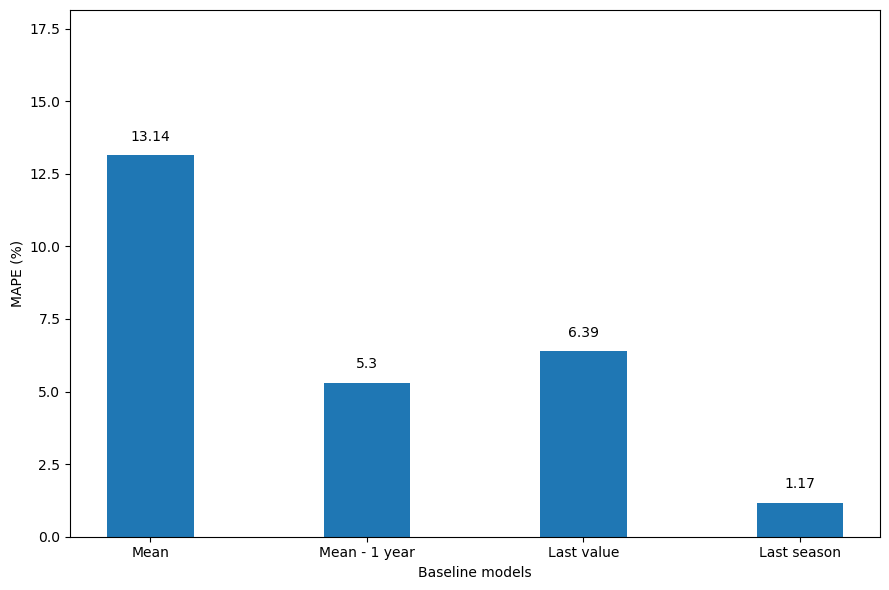

In [157]:
fig, ax = plt.subplots()

x = ['Mean', 'Mean - 1 year', 'Last value', 'Last season']
y = [mape_mean, mape_mean_1y, mape_last, mape_last_season]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Baseline models')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, max(y) + 5)

for index, value in enumerate(y):
    plt.text(x=index, y=value + 0.5, s=str(value), ha='center')
    
plt.tight_layout()